Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2023-2024
<!-- <hr> | <hr> -->
<u>**Prelim Skills Exam**

**Name** | Dela Rosa, John Errol

**Section** | CPE31S8

**Date Submitted**: | 03-17-2024

**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

---

#### 📚 Importing Libraries

In [288]:
from __future__ import print_function
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
from glob import glob

## 📝 Data Preprocessing

#### 📂 Data Loading and Path Setup

In [183]:
PATH = 'Random_Sample_of_NIH_Chest_X-ray_Dataset'
images = glob(os.path.join(PATH, 'sample', 'images', '*.png'))
images.extend(glob(os.path.join(PATH, 'sample', 'sample', 'images', '*.png')))

filepath = 'Random_Sample_of_NIH_Chest_X-ray_Dataset/sample_labels.csv'
data = pd.read_csv(filepath)

#### 🔍 Checking Data

In [184]:
data.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168
5,00000040_003.png,Consolidation|Mass,3,40,068Y,M,PA,2500,2048,0.168,0.168
6,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139
7,00000057_001.png,No Finding,1,57,071Y,M,AP,3056,2544,0.139,0.139
8,00000061_002.png,Effusion,2,61,077Y,M,PA,2992,2991,0.143,0.143
9,00000061_019.png,No Finding,19,61,077Y,M,AP,3056,2544,0.139,0.139


In [185]:
data.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacing_x',
       'OriginalImagePixelSpacing_y'],
      dtype='object')

In [186]:
data.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                     object
Patient Gender                  object
View Position                   object
OriginalImageWidth               int64
OriginalImageHeight              int64
OriginalImagePixelSpacing_x    float64
OriginalImagePixelSpacing_y    float64
dtype: object

In [187]:
data.isnull().sum()

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImageWidth             0
OriginalImageHeight            0
OriginalImagePixelSpacing_x    0
OriginalImagePixelSpacing_y    0
dtype: int64

#### 🔍 Renaming Columns

In [188]:
data.rename(
    columns={
        'Image Index': 'image',
        'Finding Labels': 'labels',
        'Patient Age': 'age',
        'Patient Gender': 'gender',
        'View Position': 'position',
        'OriginalImageWidth': 'width',
        'OriginalImageHeight': 'height',
        'OriginalImagePixelSpacing_x': 'space_x',
        'OriginalImagePixelSpacing_y': 'space_y'},
inplace=True)

#### 🔍 Displaying Unique Values in Columns

In [189]:
exclude_columns = ['image']

for column in data.columns:
    if column not in exclude_columns:
        unique_values = data[column].unique()
        print(f'Unique values in column '{column}':')
        for value in unique_values:
            print(value)
        print('--------------------------------')

Unique values in column 'labels':
Emphysema|Infiltration|Pleural_Thickening|Pneumothorax
Cardiomegaly|Emphysema
No Finding
Atelectasis
Cardiomegaly|Edema|Effusion
Consolidation|Mass
Effusion
Consolidation|Effusion|Infiltration|Nodule
Mass
Mass|Pneumothorax
Cardiomegaly|Consolidation
Consolidation
Pneumothorax
Consolidation|Pleural_Thickening
Infiltration|Nodule
Fibrosis
Infiltration
Emphysema
Atelectasis|Infiltration|Mass|Pleural_Thickening
Emphysema|Mass
Emphysema|Pneumothorax
Emphysema|Infiltration
Consolidation|Effusion|Infiltration
Consolidation|Fibrosis
Fibrosis|Pleural_Thickening
Effusion|Infiltration
Nodule
Mass|Pleural_Thickening
Infiltration|Pleural_Thickening
Pleural_Thickening
Consolidation|Infiltration|Pneumothorax
Cardiomegaly|Effusion
Atelectasis|Consolidation|Effusion
Fibrosis|Infiltration
Atelectasis|Effusion|Infiltration
Edema|Fibrosis
Edema
Cardiomegaly
Emphysema|Infiltration|Pleural_Thickening
Atelectasis|Consolidation|Effusion|Infiltration
Atelectasis|Effusion
Cardi

In [190]:
data['labels'].value_counts()

No Finding                                                3044
Infiltration                                               503
Effusion                                                   203
Atelectasis                                                192
Nodule                                                     144
                                                          ... 
Atelectasis|Edema|Effusion|Infiltration|Pneumonia            1
Atelectasis|Consolidation|Edema|Infiltration|Pneumonia       1
Atelectasis|Effusion|Hernia                                  1
Atelectasis|Hernia|Pneumothorax                              1
Cardiomegaly|Effusion|Emphysema                              1
Name: labels, Length: 244, dtype: int64

In [191]:
data['age'].unique()

array(['060Y', '057Y', '077Y', '079Y', '055Y', '068Y', '071Y', '063Y',
       '067Y', '056Y', '058Y', '075Y', '073Y', '054Y', '078Y', '047Y',
       '050Y', '045Y', '084Y', '030Y', '049Y', '061Y', '069Y', '051Y',
       '044Y', '087Y', '059Y', '031Y', '064Y', '053Y', '082Y', '072Y',
       '046Y', '080Y', '048Y', '021Y', '038Y', '062Y', '052Y', '023Y',
       '037Y', '022Y', '032Y', '070Y', '065Y', '040Y', '042Y', '041Y',
       '028Y', '035Y', '034Y', '066Y', '019Y', '039Y', '074Y', '026Y',
       '024Y', '085Y', '016Y', '029Y', '033Y', '013Y', '017Y', '020Y',
       '014Y', '043Y', '012Y', '009Y', '011Y', '027Y', '036Y', '081Y',
       '025Y', '018Y', '076Y', '083Y', '008Y', '006Y', '015Y', '002Y',
       '005Y', '010Y', '003Y', '089Y', '007Y', '086Y', '004Y', '094Y',
       '013M', '411Y', '001D', '088Y'], dtype=object)

#### 🔄 Data Cleaning

In [192]:
data['age'].replace('411Y', '041Y', inplace=True)
data['age'] = data['age'].str.replace('Y','365')
data['age'] = data['age'].str.replace('M','030')
data['age'] = data['age'].str.replace('D','001')
data['age'] = data['age'].astype(float)
data['age'] = (data['age']%1000 * data['age']//1000)//365

In [193]:
data['age'].unique()

array([60., 57., 77., 79., 55., 68., 71., 63., 67., 56., 58., 75., 73.,
       54., 78., 47., 50., 45., 84., 30., 49., 61., 69., 51., 44., 87.,
       59., 31., 64., 53., 82., 72., 46., 80., 48., 21., 38., 62., 52.,
       23., 37., 22., 32., 70., 65., 40., 42., 41., 28., 35., 34., 66.,
       19., 39., 74., 26., 24., 85., 16., 29., 33., 13., 17., 20., 14.,
       43., 12.,  9., 11., 27., 36., 81., 25., 18., 76., 83.,  8.,  6.,
       15.,  2.,  5., 10.,  3., 89.,  7., 86.,  4., 94.,  1.,  0., 88.])

In [194]:
data['gender'].replace(['F', 'M'],[0, 1],inplace=True)

In [195]:
data['gender'].value_counts()

1    3134
0    2472
Name: gender, dtype: int64

In [197]:
data[data['labels'] == 'No Finding'].shape[0]

3044

In [199]:
data.labels.replace('No Finding', 'xNone', inplace=True)
# data.drop(data[data['labels'] == 'No Finding'].index, inplace=True)
# data = data[data['labels'] != 'No Finding']

#### 📊 Data Exploration

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        5606 non-null   object 
 1   labels       5606 non-null   object 
 2   Follow-up #  5606 non-null   int64  
 3   Patient ID   5606 non-null   int64  
 4   age          5606 non-null   float64
 5   gender       5606 non-null   int64  
 6   position     5606 non-null   object 
 7   width        5606 non-null   int64  
 8   height       5606 non-null   int64  
 9   space_x      5606 non-null   float64
 10  space_y      5606 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 481.9+ KB


In [198]:
data.shape

(5606, 11)

In [200]:
data.describe()

,Follow-up #,Patient ID,age,gender,width,height,space_x,space_y
count,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000
mean,8.616661,14330.617017,46.701748,0.559044,2644.795755,2491.087406,0.155467,0.155467
std,15.565815,8411.477789,16.719394,0.496546,347.188754,399.119063,0.016201,0.016201
min,0.000000,13.000000,0.000000,0.000000,1362.000000,966.000000,0.115000,0.115000
25%,0.000000,7289.000000,35.000000,0.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,1.000000,2542.000000,2544.000000,0.143000,0.143000
75%,10.000000,20655.500000,59.000000,1.000000,2992.000000,2991.000000,0.168000,0.168000
max,177.000000,30797.000000,94.000000,1.000000,3266.000000,3056.000000,0.198800,0.198800


## 📊 Extracting Features for Diagnosis

- This converts text labels into a numerical representation that a model is able to understand by using info from data.labels column. It establishes a table in which every row represents a label and every column represents a unique word that occurs in all the labels. In the table, the numbers indicate how many times a word occurs in one document.

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names, dindex):

    # create an index for each row
    doc_names = [format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=dindex,
                      columns=feat_names)
    return(df)

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)
# convert the documents into a document-term matrix
wm = cvec.fit_transform(data.labels)
# retrieve the terms found in the corpora
tokens = cvec.get_feature_names_out()
# Array for indexing
dindex = data.index.array
# create a dataframe from the matrix
df = wm2df(wm, tokens, dindex)
# add features to dataframe
data = pd.concat([df, data], axis=1, sort=False)

## 📦 Preparing Image Data

- This code block guarantees that all images will have the same size (128x128 pixels). It extracts the corresponding labels for each image and then the code goes through each image path in the list. It gets the file name by using os.path.basename and retrieves the label associated with that image file name from the data.labels column by conditional filtering (data.labels[data.image == base]). Next, it takes the first value and adds it to the y list. Lastly, it reads the full-size image by the cv2.imread function. It applies the cv2.resize function with the interpolation method (cv2.INTER_CUBIC) to resize the image to the desired size (128x128 pixels). The image that is resized is then added to the x list.

In [203]:
def proc_images():
    x = []
    y = []
    WIDTH = 128
    HEIGHT = 128

    for img in images:
        base = os.path.basename(img)
        y.append(data.labels[data.image == base].values[0])

        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

    return x,

In [299]:
x,y = proc_images()

In [300]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

(8969, 128, 128, 3)
(2243, 128, 128, 3)
---------
<class 'numpy.ndarray'>
<class 'str'>


#### 📊 Data Shape Check

In [ ]:
print(np.array(x_train).shape)
print(np.array(x_test).shape)
print('---------')
print(type(x_train[0]))
print(type(y_train[0]))

#### 📦 Preprocessing Labels

In [301]:
len(np.unique(y_train))

244

In [225]:
enc = OneHotEncoder()

In [227]:
y_train = enc.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = enc.transform(np.array(y_test).reshape(-1, 1))

In [228]:
print(type(y_train))
print(type(y_test))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


In [230]:
data.head(10)

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,...,labels,Follow-up #,Patient ID,age,gender,position,width,height,space_x,space_y
0,0,0,0,0,0,1,0,0,1,0,...,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,60.0,1,AP,3056,2544,0.139,0.139
1,0,1,0,0,0,1,0,0,0,0,...,Cardiomegaly|Emphysema,26,13,57.0,1,AP,2500,2048,0.168,0.168
2,0,0,0,0,0,0,0,0,0,0,...,xNone,1,17,77.0,1,AP,2500,2048,0.168,0.168
3,1,0,0,0,0,0,0,0,0,0,...,Atelectasis,1,30,79.0,1,PA,2992,2991,0.143,0.143
4,0,1,0,1,1,0,0,0,0,0,...,Cardiomegaly|Edema|Effusion,1,32,55.0,0,AP,2500,2048,0.168,0.168
5,0,0,1,0,0,0,0,0,0,1,...,Consolidation|Mass,3,40,68.0,1,PA,2500,2048,0.168,0.168
6,0,0,0,0,0,0,0,0,0,0,...,xNone,2,42,71.0,1,AP,3056,2544,0.139,0.139
7,0,0,0,0,0,0,0,0,0,0,...,xNone,1,57,71.0,1,AP,3056,2544,0.139,0.139
8,0,0,0,0,1,0,0,0,0,0,...,Effusion,2,61,77.0,1,PA,2992,2991,0.143,0.143
9,0,0,0,0,0,0,0,0,0,0,...,xNone,19,61,77.0,1,AP,3056,2544,0.139,0.139


## 🚀 Model Definition and Training

#### 🛠️ ScratchModel Architecture

In [229]:
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Conv2D(128, (3, 3)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Conv2D(128, (3, 3)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(64))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dense(244))
model_1.add(BatchNormalization())
model_1.add(Activation('softmax'))

model_1.summary()

c:\Users\rdlor\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 61, 61, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 244)            │        15,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 244)            │           976 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_54 (Activation)      │ (None, 244)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,809,412 (6.90 MB)

 Trainable params: 1,808,220 (6.90 MB)

 Non-trainable params: 1,192 (4.66 KB)

#### 🔍 Image Data Generators

In [ ]:
train_imgdata = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, rotation_range=10)
valtest_imgdata = ImageDataGenerator(rescale=1. / 255)

from scipy.sparse import csr_matrix
y_train = y_train.toarray()
y_test= y_test.toarray()

train_gen = train_imgdata.flow(np.array(x_train), y_train, batch_size=batch_size)
test_gen = valtest_imgdata.flow(np.array(x_test), y_test, batch_size=batch_size)

In [232]:
train_batch, train_labels = next(train_gen)
test_batch, test_labels = next(test_gen)

print('Train Batch Shape:', train_batch.shape)
print('Train Label Shape:', train_labels.shape)
print('Test Batch Shape:', test_batch.shape)
print('Test Label Shape:', test_labels.shape)
print('-------------')
print('Train Batch Sample:', train_batch[:2])
print('Train Label Sample:', train_labels[:2])
print('Test Batch Sample:', test_batch[:2])
print('Test Label Sample:', test_labels[:2]

Train Batch Shape: (32, 128, 128, 3)
Train Label Shape: (32, 244)
Test Batch Shape: (32, 128, 128, 3)
Test Label Shape: (32, 244)
-------------
Train Batch Sample: [[[[0.07998659 0.07998659 0.07998659]
   [0.01621171 0.01621171 0.01621171]
   [0.02731081 0.02731081 0.02731081]
   ...
   [0.6355875  0.6355875  0.6355875 ]
   [0.63390213 0.63390213 0.63390213]
   [0.6320701  0.6320701  0.6320701 ]]

  [[0.08578807 0.08578807 0.08578807]
   [0.01590637 0.01590637 0.01590637]
   [0.02273069 0.02273069 0.02273069]
   ...
   [0.61227626 0.61227626 0.61227626]
   [0.6111045  0.6111045  0.6111045 ]
   [0.6101884  0.6101884  0.6101884 ]]

  [[0.08887593 0.08887593 0.08887593]
   [0.01730596 0.01730596 0.01730596]
   [0.01951069 0.01951069 0.01951069]
   ...
   [0.6002915  0.6002915  0.6002915 ]
   [0.5989591  0.5989591  0.5989591 ]
   [0.5974324  0.5974324  0.5974324 ]]

  ...

  [[0.3872554  0.3872554  0.3872554 ]
   [0.40649194 0.40649194 0.40649194]
   [0.4179563  0.4179563  0.4179563 ]
   .

In [233]:
print(np.array(x_train).shape)
print(np.array(y_train).shape)

(8969, 128, 128, 3)
(8969, 244)


#### 🚀 Training ScratchModel

In [236]:
batch_size = 32
epochs = 50
opt = optimizers.RMSprop(learning_rate = 0.0005)

model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score_1 = model_1.fit(train_gen, batch_size=batch_size, epochs=epochs, validation_data=test_gen)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 150s 515ms/step - accuracy: 0.1195 - loss: 5.1230 - val_accuracy: 0.2782 - val_loss: 4.6313
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 143s 507ms/step - accuracy: 0.2393 - loss: 4.7418 - val_accuracy: 0.0588 - val_loss: 6.2027
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 145s 514ms/step - accuracy: 0.2805 - loss: 4.4726 - val_accuracy: 0.4365 - val_loss: 3.8600
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 144s 511ms/step - accuracy: 0.3296 - loss: 4.2089 - val_accuracy: 0.0718 - val_loss: 5.8724
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 144s 511ms/step - accuracy: 0.3407 - loss: 4.0092 - val_accuracy: 0.0691 - val_loss: 6.0647
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 145s 512ms/step - accuracy: 0.3746 - loss: 3.7496 - val_accuracy: 0.0700 - val_loss: 5.6954
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 145s 513ms/step - accuracy: 0.4028 - loss: 3.5644 - val_accuracy: 0.0669 - val_loss: 5.9528
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 143s 507ms/step - accuracy: 0.4128 -

In [237]:
opt = optimizers.RMSprop(learning_rate = 0.0005)
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score_1 = model_1.fit(train_gen, batch_size=32, epochs=15, validation_data=test_gen)

Epoch 1/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 148s 513ms/step - accuracy: 0.7773 - loss: 1.0546 - val_accuracy: 0.6817 - val_loss: 1.5545
Epoch 2/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 517ms/step - accuracy: 0.7950 - loss: 0.9780 - val_accuracy: 0.5916 - val_loss: 1.7998
Epoch 3/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 141s 498ms/step - accuracy: 0.8090 - loss: 0.9362 - val_accuracy: 0.6322 - val_loss: 1.7019
Epoch 4/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 144s 509ms/step - accuracy: 0.8041 - loss: 0.9342 - val_accuracy: 0.7160 - val_loss: 1.4101
Epoch 5/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 143s 506ms/step - accuracy: 0.8059 - loss: 0.9542 - val_accuracy: 0.6910 - val_loss: 1.5062
Epoch 6/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 143s 507ms/step - accuracy: 0.8053 - loss: 0.9444 - val_accuracy: 0.7017 - val_loss: 1.5137
Epoch 7/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 141s 500ms/step - accuracy: 0.8252 - loss: 0.8718 - val_accuracy: 0.7329 - val_loss: 1.3105
Epoch 8/15
281/281 ━━━━━━━━━━━━━━━━━━━━ 143s 507ms/step - accuracy: 0.8211 -

In [246]:
opt = optimizers.RMSprop(learning_rate = 0.0005)
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score_1 = model_1.fit(train_gen, batch_size=32, epochs=25, validation_data=test_gen)

Epoch 1/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 140s 487ms/step - accuracy: 0.8544 - loss: 0.7390 - val_accuracy: 0.7593 - val_loss: 1.2174
Epoch 2/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 137s 485ms/step - accuracy: 0.8558 - loss: 0.7468 - val_accuracy: 0.7490 - val_loss: 1.2235
Epoch 3/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 138s 489ms/step - accuracy: 0.8597 - loss: 0.7205 - val_accuracy: 0.7022 - val_loss: 1.3896
Epoch 4/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 138s 490ms/step - accuracy: 0.8681 - loss: 0.6744 - val_accuracy: 0.7218 - val_loss: 1.3295
Epoch 5/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 138s 488ms/step - accuracy: 0.8634 - loss: 0.6828 - val_accuracy: 0.7824 - val_loss: 1.1699
Epoch 6/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 137s 487ms/step - accuracy: 0.8659 - loss: 0.7112 - val_accuracy: 0.7258 - val_loss: 1.3221
Epoch 7/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 137s 486ms/step - accuracy: 0.8684 - loss: 0.6712 - val_accuracy: 0.7989 - val_loss: 1.0771
Epoch 8/25
281/281 ━━━━━━━━━━━━━━━━━━━━ 138s 489ms/step - accuracy: 0.8628 -

#### 📈 ScratchModel Evaluation

In [247]:
print('Train Loss:', score_1.history['loss'][-1])
print('Train Accuracy:', score_1.history['accuracy'][-1])
print('Validation Loss:', score_1.history['val_loss'][-1])
print('Validation Accuracy:', score_1.history['val_accuracy'][-1])

Train Loss: 0.6073850989341736
Train Accuracy: 0.8759058713912964
Validation Loss: 1.231675386428833
Validation Accuracy: 0.7668301463127136


#### 📈 Plotting ScratchModel Metrics

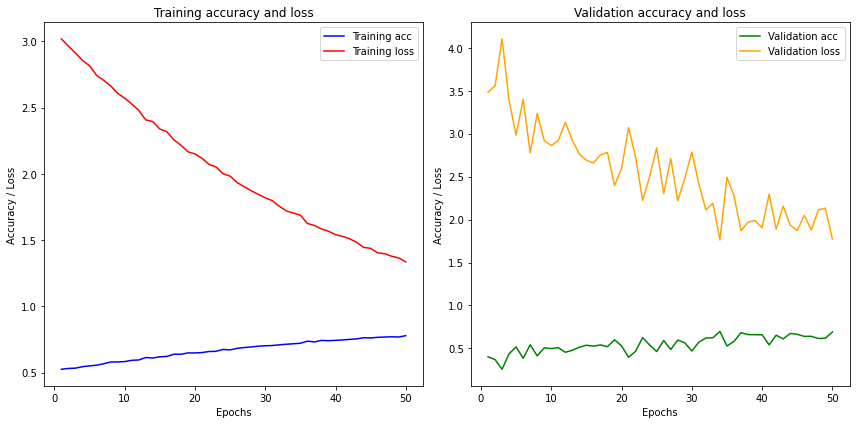

In [248]:
train_epochs = range(1, len(acc) + 1)
val_epochs = range(1, len(val_acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_epochs, acc, 'blue', label='Training acc')
plt.plot(train_epochs, loss, 'red', label='Training loss')
plt.title('Training accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_epochs, val_acc, 'green', label='Validation acc')
plt.plot(val_epochs, val_loss, 'orange', label='Validation loss')
plt.title('Validation accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 🚀 Model 2 Training (Using VGG16)

In [269]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

#### 🚀 Customizing VGG16 Model Architecture

In [270]:
for layer in base_model.layers:
    layer.trainable = False

In [272]:
from tensorflow.keras.layers import BatchNormalization

x = Flatten()(base_model.output)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
output = Dense(244)(x)
output = BatchNormalization()(output)
output = Activation('softmax')(output)

In [273]:
model_vgg16 = Model(inputs=base_model.input, outputs=output)

#### 🚀 Compiling and Training Customized VGG16 Model

In [274]:
batch_size = 32
epochs = 50
opt = optimizers.RMSprop(learning_rate = 0.0005)

model_vgg16.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score_vgg16 = model_vgg16.fit(train_gen, batch_size=batch_size, epochs=epochs, validation_data=test_gen)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 245s 864ms/step - accuracy: 0.0338 - loss: 5.5903 - val_accuracy: 0.3379 - val_loss: 4.5482
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 247s 876ms/step - accuracy: 0.2412 - loss: 4.8378 - val_accuracy: 0.3576 - val_loss: 4.0456
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 261s 926ms/step - accuracy: 0.2842 - loss: 4.5502 - val_accuracy: 0.3134 - val_loss: 4.3469
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 251s 890ms/step - accuracy: 0.3204 - loss: 4.3001 - val_accuracy: 0.4169 - val_loss: 3.6338
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 247s 876ms/step - accuracy: 0.3294 - loss: 4.0730 - val_accuracy: 0.4039 - val_loss: 3.4217
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 244s 865ms/step - accuracy: 0.3525 - loss: 3.8471 - val_accuracy: 0.4677 - val_loss: 3.3204
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 248s 881ms/step - accuracy: 0.3813 - loss: 3.6624 - val_accuracy: 0.4712 - val_loss: 3.0950
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 247s 876ms/step - accuracy: 0.3832 -

#### 📈 Model 2 Evaluation and Plotting

In [275]:
vgg_loss = score_vgg16.history['loss']
vgg_acc = score_vgg16.history['accuracy']
vgg_val_loss = score_vgg16.history['val_loss']
vgg_val_acc = score_vgg16.history['val_accuracy']

print('Train Loss:', vgg_loss[-1])
print('Train Accuracy:', vgg_acc[-1])
print('Validation Loss:', vgg_val_loss[-1])
print('Validation Accuracy:', vgg_val_acc[-1])

Train Loss: 1.6738146543502808
Train Accuracy: 0.6138923168182373
Validation Loss: 1.9196293354034424
Validation Accuracy: 0.5769059062004089


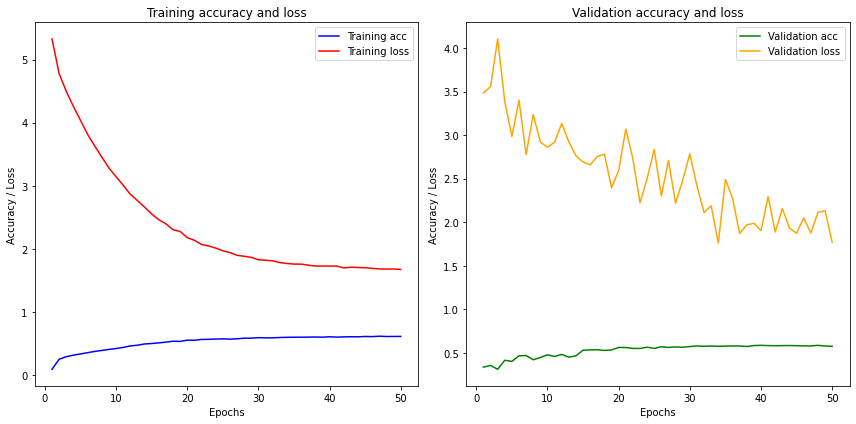

In [276]:
vgg_train_epochs = range(1, len(vgg_acc) + 1)
vgg_val_epochs = range(1, len(vgg_val_acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(vgg_train_epochs, vgg_acc, 'blue', label='Training acc')
plt.plot(vgg_train_epochs, vgg_loss, 'red', label='Training loss')
plt.title('Training accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_epochs, vgg_val_acc, 'green', label='Validation acc')
plt.plot(val_epochs, val_loss, 'orange', label='Validation loss')
plt.title('Validation accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [292]:
# y_pred_scratchmod = model_1.predict(x_test)
# y_pred_vgg16 = model_vgg16.predict(x_test)

# y_true_scratchmod = np.argmax(y_test, axis=1)
# y_true_vgg16 = np.argmax(y_test, axis=1)

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# y_pred_1 = model_1.predict(x_test)
# y_pred_classes_1 = np.argmax(y_pred_1, axis=1)

# class_rep = classification_report(np.argmax(y_test, axis=1), y_pred_classes_1)
# print("\nClassification Report (Model 1):")
# print(class_rep)

# conf_mtrx = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes_1)
# print("Confusion Matrix (Model 1):")
# print(conf_mtrx)

# roc_auc = roc_auc_score(y_test, y_pred_1, average='macro')
# print("\nROC AUC Score (Model 1):", roc_auc)